In [172]:
from sympy import *
s, t = symbols('s, t')

In [173]:
c = Rational(2, 10)
x = s + c*sin(pi*s)*sin(pi*t)
y = t + c*sin(pi*s)*sin(pi*t)

In [174]:
(x.subs(s, 0).subs(t, 0), 
 x.subs(s,-1).subs(t,-1), 
 y.subs(s, 0).subs(t, 0), 
 y.subs(s,-1).subs(t,-1))

(0, -1, 0, -1)

In [175]:
J = Matrix([[diff(x, s), diff(x, t)], 
            [diff(y, s), diff(y, t)]])
J

Matrix([
[pi*sin(pi*t)*cos(pi*s)/5 + 1,     pi*sin(pi*s)*cos(pi*t)/5],
[    pi*sin(pi*t)*cos(pi*s)/5, pi*sin(pi*s)*cos(pi*t)/5 + 1]])

In [176]:
g = J.T*J
simplify(g)

Matrix([
[      (pi*sin(pi*t)*cos(pi*s) + 5)**2/25 + pi**2*sin(pi*t)**2*cos(pi*s)**2/25, pi*(20*sin(pi*(s + t)) + pi*cos(pi*(2*s - 2*t)) - pi*cos(pi*(2*s + 2*t)))/100],
[pi*(20*sin(pi*(s + t)) + pi*cos(pi*(2*s - 2*t)) - pi*cos(pi*(2*s + 2*t)))/100,       (pi*sin(pi*s)*cos(pi*t) + 5)**2/25 + pi**2*sin(pi*s)**2*cos(pi*t)**2/25]])

In [177]:
# Calculate the invariants
I   = g.trace()
II  = (g.trace()**2 - (g**2).trace())/2
III = g.det()

In [178]:
# Convert to C code for easy inclusion in the shaders. 
print(printing.ccode(x, assign_to='x'))
print(printing.ccode(y, assign_to='y'))

x = s + (1.0L/5.0L)*sin(M_PI*s)*sin(M_PI*t);
y = t + (1.0L/5.0L)*sin(M_PI*s)*sin(M_PI*t);


In [179]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sympy.utilities.lambdify import lambdify

In [180]:
# Plot a symbolic expression
def plot_st(expr):
    X = Y = np.linspace(-1, +1, 100)
    X, Y = np.meshgrid(X, Y)
    Z = lambdify((s,t), expr, 'numpy')(X, Y)+ 0*X
    con = plt.contourf(X, Y, Z)
    cbar = plt.colorbar(con)

Plot the invariants of the metric

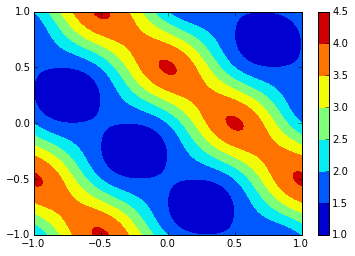

In [181]:
plot_st(I)

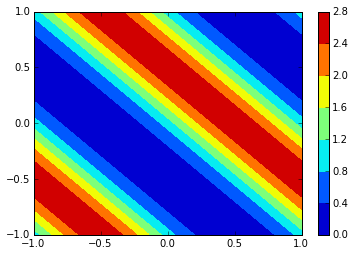

In [182]:
plot_st(II)

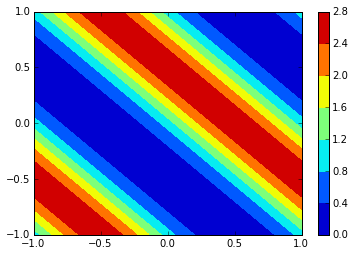

In [183]:
plot_st(III)

Plot the components of the metric

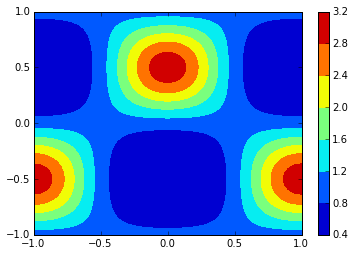

In [184]:
plot_st(g[0,0])

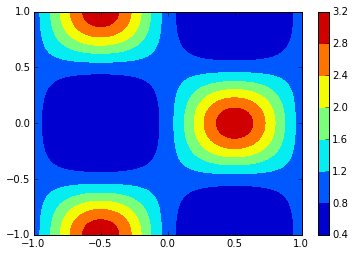

In [185]:
plot_st(g[1,1])

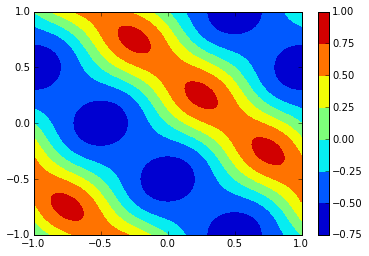

In [186]:
plot_st(g[1,0])